In [10]:
from jupyter_core.version import pattern

from configs import AspectsConfig, default_configs
from tag import Tag

import pymupdf
import numpy as np
import matplotlib.pyplot as plt

doc = pymupdf.open("pdfs/sample2.pdf")  # open a document.

In [2]:
def show_image(item, title=""):
    """Display a pixmap.

    Just to display Pixmap image of "item" - ignore the man behind the curtain.

    Args:
        item: any PyMuPDF object having a "get_pixmap" method.
        title: a string to be used as image title

    Generates an RGB Pixmap from item using a constant DPI and using matplotlib
    to show it inline of the notebook.
    """
    DPI = 150  # use this resolution

    # %matplotlib inline
    pix = item.get_pixmap(dpi=DPI)
    img = np.ndarray([pix.h, pix.w, 3], dtype=np.uint8, buffer=pix.samples_mv)
    plt.figure(dpi=DPI)  # set the figure's DPI
    plt.title(title)  # set title of image
    _ = plt.imshow(img, extent=(0, pix.w * 72 / DPI, pix.h * 72 / DPI, 0))

Page height: 842.3900146484375, width: 1191.050048828125
Number of text blocks: 42
from
Page

----------------------------------------
Grinding machine

----------------------------------------
Ed.

----------------------------------------
2

----------------------------------------
001

----------------------------------------
EPL
Date
Date

----------------------------------------
1

----------------------------------------
Modification

----------------------------------------
7
6
8
9
3

----------------------------------------
321

----------------------------------------
&EPA1/1

----------------------------------------
4

----------------------------------------
16.11.2023
23

----------------------------------------
2

----------------------------------------
Name

----------------------------------------
5

----------------------------------------
EPLAN GmbH & Co. KG
&EFA4

----------------------------------------
+

----------------------------------------
=
Topology: Routed c

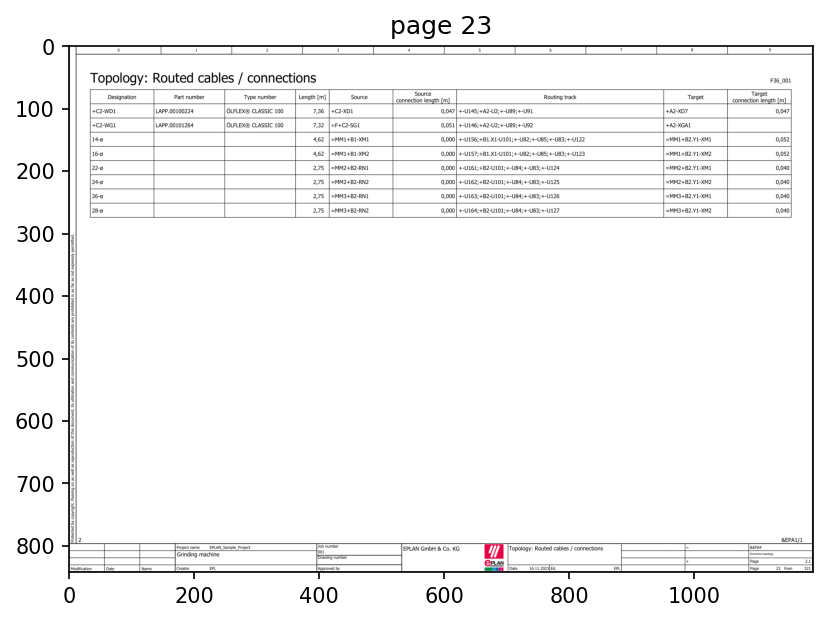

In [18]:
# The goal is to extract the footer, It's a table at the bottom of the page.
doc = pymupdf.open("pdfs/sample.pdf")  # open a document.

page = doc.load_page(22)  # a random page to taste, page 23
page_h = page.rect.height  # get the height of the page
page_w = page.rect.width  # get the width of the page
print(f"Page height: {page_h}, width: {page_w}")

show_image(page, "page 23")

# get all text blocks
text_blocks = page.get_text("blocks")
print(f"Number of text blocks: {len(text_blocks)}")

# loop and print the text in  blocks
for i, block in enumerate(text_blocks):
    print(f"{block[4]}")  # block[4] contains the text
    print("--" * 20)

In [34]:
import pymupdf  # PyMuPDF, imported as 'fitz' in older versions
from tag import Tag
import re


def extract_object_tags_from_pdf(page: pymupdf.Page, configs: AspectsConfig):
    """
    Reads a PDF document, extracts text from each page, and finds all unique
    object tags matching a specific EPLAN/IEC pattern.

    Args:
        file_path (str): The full path to the PDF file.

    Returns:
        list: A sorted list of unique Tag instances found in the document.
              Returns an empty list if the file cannot be opened.
    """
    # Use a set to automatically store only unique tags
    all_tags = set()
    seps = list(configs.separators())
    # pattern_accepted_text = re.compile(r'[=+-][A-Z0-9][A-Z0-9+\-=&/:;.]*')
    # A valid pattern is one or more of a block that starts with one of the separators, followed by an uppercase letters or digits.
    pattern_accepted_text = re.compile(
        rf"[{re.escape(''.join(seps))}][A-Z0-9{re.escape(''.join(seps))}&/:;.]*"
    )
    text_content = page.get_text()

    # Find all matches in the text content
    matches = pattern_accepted_text.findall(text_content)

    if matches:
        print(f"Found {len(matches)} matches")
        for match in matches:
            # Clean the match
            cleaned_tag = match.strip()
            if len(cleaned_tag) > 2:  # Filter out very short matches
                obj_tag = Tag(cleaned_tag)
                all_tags.add(obj_tag)
                print(f"  - {obj_tag}")

    # Convert the set to a sorted list (sorted by tag string)
    return sorted(list(all_tags))


extract_object_tags_from_pdf(doc[22], default_configs)

Found 41 matches
  - Tag(tag_str='&EPA1/1'
  - Tag(tag_str='&EFA4'
  - Tag(tag_str='+C2-WD1'
  - Tag(tag_str='+C2-XD1'
  - Tag(tag_str='+A2-XD7'
  - Tag(tag_str='+-U145;+A2-U2;+-U89;+-U91'
  - Tag(tag_str='+C2-WG1'
  - Tag(tag_str='=F+C2-SG1'
  - Tag(tag_str='+A2-XGA1'
  - Tag(tag_str='+-U146;+A2-U2;+-U89;+-U92'
  - Tag(tag_str='=MM1+B1-XM1'
  - Tag(tag_str='=MM1+B2.Y1-XM1'
  - Tag(tag_str='+-U156;+B1.X1-U101;+-U82;+-U85;+-U83;+-U122'
  - Tag(tag_str='=MM1+B1-XM2'
  - Tag(tag_str='=MM1+B2.Y1-XM2'
  - Tag(tag_str='+-U157;+B1.X1-U101;+-U82;+-U85;+-U83;+-U123'
  - Tag(tag_str='=MM2+B2-RN1'
  - Tag(tag_str='=MM2+B2.Y1-XM1'
  - Tag(tag_str='+-U161;+B2-U101;+-U84;+-U83;+-U124'
  - Tag(tag_str='=MM2+B2-RN2'
  - Tag(tag_str='=MM2+B2.Y1-XM2'
  - Tag(tag_str='+-U162;+B2-U101;+-U84;+-U83;+-U125'
  - Tag(tag_str='=MM3+B2-RN1'
  - Tag(tag_str='=MM3+B2.Y1-XM1'
  - Tag(tag_str='+-U163;+B2-U101;+-U84;+-U83;+-U126'
  - Tag(tag_str='=MM3+B2-RN2'
  - Tag(tag_str='=MM3+B2.Y1-XM2'
  - Tag(tag_str='+-U164;+

[Tag(tag_str='&EFA4',
 Tag(tag_str='&EPA1/1',
 Tag(tag_str='+-U145;+A2-U2;+-U89;+-U91',
 Tag(tag_str='+-U146;+A2-U2;+-U89;+-U92',
 Tag(tag_str='+-U156;+B1.X1-U101;+-U82;+-U85;+-U83;+-U122',
 Tag(tag_str='+-U157;+B1.X1-U101;+-U82;+-U85;+-U83;+-U123',
 Tag(tag_str='+-U161;+B2-U101;+-U84;+-U83;+-U124',
 Tag(tag_str='+-U162;+B2-U101;+-U84;+-U83;+-U125',
 Tag(tag_str='+-U163;+B2-U101;+-U84;+-U83;+-U126',
 Tag(tag_str='+-U164;+B2-U101;+-U84;+-U83;+-U127',
 Tag(tag_str='+A2-XD7',
 Tag(tag_str='+A2-XGA1',
 Tag(tag_str='+C2-WD1',
 Tag(tag_str='+C2-WG1',
 Tag(tag_str='+C2-XD1',
 Tag(tag_str='=F+C2-SG1',
 Tag(tag_str='=MM1+B1-XM1',
 Tag(tag_str='=MM1+B1-XM2',
 Tag(tag_str='=MM1+B2.Y1-XM1',
 Tag(tag_str='=MM1+B2.Y1-XM2',
 Tag(tag_str='=MM2+B2-RN1',
 Tag(tag_str='=MM2+B2-RN2',
 Tag(tag_str='=MM2+B2.Y1-XM1',
 Tag(tag_str='=MM2+B2.Y1-XM2',
 Tag(tag_str='=MM3+B2-RN1',
 Tag(tag_str='=MM3+B2-RN2',
 Tag(tag_str='=MM3+B2.Y1-XM1',
 Tag(tag_str='=MM3+B2.Y1-XM2']

In [37]:
import re
import graphviz
from treelib import Tree


def build_tree(object_tags, config: AspectsConfig):
    """
    Builds a hierarchical tree from a list of Tag instances.
    """
    project_tree = {"name": "Project", "type": "root", "children": {}}

    print("--- Building Hierarchy Tree ---")
    for tag in object_tags:
        # Skip if not a Tag instance
        if not isinstance(tag, Tag):
            continue

        # Get tag parts using the configuration
        tag_parts = tag.get_tag_parts(config)

        current_level = project_tree["children"]

        # Build hierarchy based on tag parts
        for separator, value in tag_parts.items():
            if value and value.strip():  # Only add non-empty values
                # Get the aspect type from config
                level_config = config.levels.get(separator)
                aspect_type = level_config.Aspect.lower() if level_config else "unknown"

                if value not in current_level:
                    current_level[value] = {
                        "name": value,
                        "type": aspect_type,
                        "children": {},
                    }
                current_level = current_level[value]["children"]

    return project_tree


def add_nodes_to_graph(graph, node, parent_id_safe):
    """
    Recursively adds nodes and edges using "safe" IDs for graphviz.
    """
    for child_name, child_node in node["children"].items():
        # Create a sanitized ID for Graphviz by replacing special chars
        safe_child_name = re.sub(r"[:;/\\.<>+=-]", "_", child_name)
        node_id_safe = f"{parent_id_safe}_{safe_child_name}"

        # Use the safe ID for node creation, but the original name for the label
        # Handle unknown node types by defaulting to 'unknown' style
        node_type = child_node["type"]
        style = node_styles.get(node_type, node_styles["unknown"])
        graph.node(node_id_safe, label=child_node["name"], style="filled", **style)
        graph.edge(parent_id_safe, node_id_safe)

        # Recurse using the new safe ID
        add_nodes_to_graph(graph, child_node, node_id_safe)


def visualize_tree_graphviz(
    tree, output_filename="eplan_device_tree", file_format="pdf"
):
    """
    Visualizes the tree using graphviz with high-resolution and format options.
    """
    dot = graphviz.Digraph("EPLAN_Project", comment="Device Hierarchy")
    dot.attr("node", shape="box", style="rounded", fontsize="10")
    dot.attr(rankdir="TB")

    # Graph attributes for better visualization
    dot.attr("graph", overlap="false", splines="ortho")

    # Add the root node
    root_id_safe = re.sub(r"[:;/\\.<>+=-]", "_", tree["name"])
    dot.node(
        root_id_safe,
        label=tree["name"],
        style="filled",
        fillcolor="black",
        fontcolor="white",
        shape="octagon",
    )

    # Recursively add all other nodes and edges
    add_nodes_to_graph(dot, tree, root_id_safe)

    # Render the graph
    try:
        rendered_path = dot.render(
            output_filename, view=True, cleanup=True, format=file_format
        )
        print(f"\nSuccessfully generated high-resolution graph: '{rendered_path}'")
    except graphviz.backend.ExecutableNotFound:
        print("\n--- Graphviz Error ---")
        print(
            "Graphviz executable not found. Please ensure it is installed and in your system's PATH."
        )
    except Exception as e:
        print(f"An error occurred during rendering: {e}")


def visualize_tree_treelib(tree):
    """
    Visualizes the tree in console using treelib.
    """
    console_tree = Tree()
    root_id = tree["name"]
    console_tree.create_node(root_id, root_id)

    def add_children(parent_node_data, parent_id):
        for child_name, child_data in parent_node_data["children"].items():
            child_id = f"{parent_id}_{re.sub(r'[:;/\\.<>+=-]', '_', child_name)}"
            console_tree.create_node(child_name, child_id, parent=parent_id)
            add_children(child_data, child_id)

    add_children(tree, root_id)
    print("\n--- Console Tree View ---")
    console_tree.show(line_type="ascii-em")


def print_tag_summary(tags, config: AspectsConfig):
    """
    Print a summary of the extracted Tag instances.
    """
    print(f"\n--- Summary of {len(tags)} Tags ---")

    aspects_count = {}
    for tag in tags:
        tag_parts = tag.get_tag_parts(config)
        for separator, value in tag_parts.items():
            level_config = config.levels.get(separator)
            if level_config and value:
                aspect = level_config.Aspect
                if aspect not in aspects_count:
                    aspects_count[aspect] = set()
                aspects_count[aspect].add(value)

    for aspect, values in aspects_count.items():
        print(f"Unique {aspect}: {len(values)}")


# Define styles for the visual graph
node_styles = {
    "functional": {"shape": "ellipse", "fillcolor": "#D6EAF8"},
    "location": {"shape": "box", "fillcolor": "#D5F5E3"},
    "product": {"shape": "note", "fillcolor": "#FCF3CF"},
    "document": {"shape": "folder", "fillcolor": "#FADBD8"},
    "root": {"shape": "box", "fillcolor": "#EAECEE"},
    "unknown": {"shape": "box", "fillcolor": "#F8F9FA"},
}

# Extract tags from the document and visualize
extracted_tags = extract_object_tags_from_pdf(doc[22], default_configs)

if extracted_tags:
    # Print summary
    print_tag_summary(extracted_tags, default_configs)

    print("\n--- Building Hierarchy Tree ---")
    # 1. Build the nested dictionary structure
    device_tree = build_tree(extracted_tags, default_configs)

    # 2. Visualize the tree in the console
    visualize_tree_treelib(device_tree)

    # 3. Generate the graphical visualization
    visualize_tree_graphviz(device_tree)
else:
    print("\n--- No tags found to visualize. ---")

Found 41 matches
  - Tag(tag_str='&EPA1/1'
  - Tag(tag_str='&EFA4'
  - Tag(tag_str='+C2-WD1'
  - Tag(tag_str='+C2-XD1'
  - Tag(tag_str='+A2-XD7'
  - Tag(tag_str='+-U145;+A2-U2;+-U89;+-U91'
  - Tag(tag_str='+C2-WG1'
  - Tag(tag_str='=F+C2-SG1'
  - Tag(tag_str='+A2-XGA1'
  - Tag(tag_str='+-U146;+A2-U2;+-U89;+-U92'
  - Tag(tag_str='=MM1+B1-XM1'
  - Tag(tag_str='=MM1+B2.Y1-XM1'
  - Tag(tag_str='+-U156;+B1.X1-U101;+-U82;+-U85;+-U83;+-U122'
  - Tag(tag_str='=MM1+B1-XM2'
  - Tag(tag_str='=MM1+B2.Y1-XM2'
  - Tag(tag_str='+-U157;+B1.X1-U101;+-U82;+-U85;+-U83;+-U123'
  - Tag(tag_str='=MM2+B2-RN1'
  - Tag(tag_str='=MM2+B2.Y1-XM1'
  - Tag(tag_str='+-U161;+B2-U101;+-U84;+-U83;+-U124'
  - Tag(tag_str='=MM2+B2-RN2'
  - Tag(tag_str='=MM2+B2.Y1-XM2'
  - Tag(tag_str='+-U162;+B2-U101;+-U84;+-U83;+-U125'
  - Tag(tag_str='=MM3+B2-RN1'
  - Tag(tag_str='=MM3+B2.Y1-XM1'
  - Tag(tag_str='+-U163;+B2-U101;+-U84;+-U83;+-U126'
  - Tag(tag_str='=MM3+B2-RN2'
  - Tag(tag_str='=MM3+B2.Y1-XM2'
  - Tag(tag_str='+-U164;+